In [1]:
# Impor library pandas dan matplot
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Set variabel untuk dataset latih
# Separator titik koma dan decimal berupa koma karena data berasal dari excel
data_latih = pd.read_csv('./dataset-latih.csv', sep=';', decimal=',')

In [22]:
# Cek fitur parameter data latih
data_latih.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [29]:
# Cek statistik data latih
data_latih.describe()

,Age,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,49.117400,7.631990,68.85492
std,7.923285,0.439814,1.720461,8.90664
min,6.000000,48.000000,2.900000,49.00000
25%,10.000000,49.000000,6.400000,65.00000
50%,13.000000,49.000000,7.700000,68.30000
75%,15.000000,49.000000,9.000000,72.20000
max,48.000000,50.000000,10.500000,92.70000


In [26]:
# Cek total data pada dataset latih
data_latih.count()

Gender           10000
Age              10000
Birth Weight     10000
Birth Length     10000
Body Weight      10000
Body Length      10000
Breastfeeding    10000
Stunting         10000
dtype: int64

In [5]:
# Hapus kolom data kosong
data_latih = data_latih.dropna()

In [6]:
# Cek Tipe Data
print(data_latih['Age'].dtype) # int64
print(data_latih['Body Weight'].dtype) # object
print(data_latih['Body Length'].dtype) # Object

int64
object
object


In [28]:
# Ubah format tipe data menjadi numeral
data_latih['Age'] = pd.to_numeric(data_latih['Age']) # int64
data_latih['Body Weight'] = pd.to_numeric(data_latih['Body Weight']) # float64
data_latih['Body Length'] = pd.to_numeric(data_latih['Body Length']) # float64

In [8]:
# Pencarian outlier pada Fitur Age
# Mencari Q1 dan Q3
Q1_age = data_latih['Age'].quantile(0.25)
Q3_age = data_latih['Age'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_age = Q3_age - Q1_age
age_bawah = Q1_age - 1.5 * IQR_age
age_atas = Q3_age + 1.5 * IQR_age

# Mencari data outlier dari dataset latih
outlier_age = data_latih.loc[(data_latih['Age'] < age_bawah) | (data_latih['Age'] > age_atas)]

In [9]:
# Mencari noise pada outlier age
# Data usia wajar menurut WHO yakni 1 sampai dengan 60 bulan
noise_age = outlier_age.loc[(outlier_age['Age'] < 1) | (outlier_age['Age'] > 60)]

# Hapus data tidak wajar pada data latih
data_latih = data_latih.drop(index = noise_age.index).reset_index(drop=True)

In [10]:
# Pencarian outlier pada Fitur Body Weight
# Mencari Q1 dan Q3
Q1_weight = data_latih['Body Weight'].quantile(0.25)
Q3_weight = data_latih['Body Weight'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_weight = Q3_weight - Q1_weight
weight_bawah = Q1_weight - 1.5 * IQR_weight
weight_atas = Q3_weight + 1.5 * IQR_weight

# Mencari data outlier dari dataset latih
outlier_weight = data_latih.loc[(data_latih['Body Weight'] < weight_bawah) | (data_latih['Body Weight'] > weight_atas)]

In [11]:
# Mencari noise pada outlier Body Weight
# Data berat wajar menurut WHO yakni 2 sampai dengan 28
noise_weight = outlier_weight.loc[(outlier_weight['Body Weight'] < 2) | (outlier_weight['Body Weight'] > 28)]

# Hapus noise pada data latih sesuai dengan index
data_latih = data_latih.drop(index = noise_weight.index).reset_index(drop=True)

In [12]:
# Pencarian outlier pada Fitur Body Length
# Mencari Q1 dan Q3
Q1_length = data_latih['Body Length'].quantile(0.25)
Q3_length = data_latih['Body Length'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_length = Q3_length - Q1_length
length_bawah = Q1_length - 1.5 * IQR_length
length_atas = Q3_length + 1.5 * IQR_length

# Mencari data outlier dari dataset latih
outlier_length = data_latih.loc[(data_latih['Body Length'] < length_bawah) | (data_latih['Body Weight'] > length_atas)]

In [13]:
# Mencari noise pada outlier Body Length
# Data panjang/tinggi wajar menurut WHO yakni 44 sampai dengan 124
noise_length = outlier_length.loc[(outlier_length['Body Length'] < 44) | (outlier_length['Body Length'] > 124)]

# Hapus noise pada data latih sesuai dengan index
data_latih = data_latih.drop(index = noise_length.index).reset_index(drop=True)

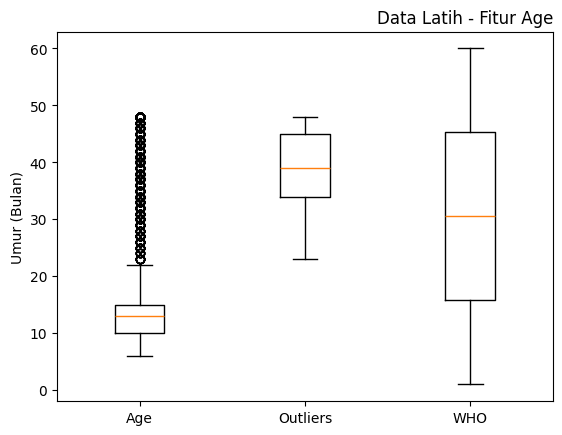

In [14]:
# Visualisasi data berbentuk boxplot untuk data Age
# Batasan WHO
who_age = list(range(1,61))
data = [data_latih['Age'], outlier_age['Age'], who_age]
labels = ['Age', 'Outliers', 'WHO']

plt.title('Data Latih - Fitur Age', loc='right')
plt.ylabel('Umur (Bulan)')
plt.boxplot(data, tick_labels=labels)
plt.show()

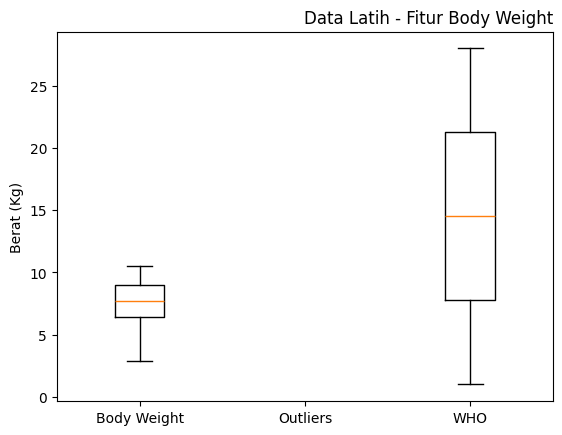

In [15]:
# Visualisasi data berbentuk boxplot untuk data Body Weight
# Batasan WHO
who_weight = list(range(1, 29))
data = [data_latih['Body Weight'], outlier_weight['Body Weight'], who_weight]
labels = ['Body Weight', 'Outliers', 'WHO']

plt.title('Data Latih - Fitur Body Weight', loc='right')
plt.ylabel('Berat (Kg)')
plt.boxplot(data, tick_labels=labels)
plt.show()

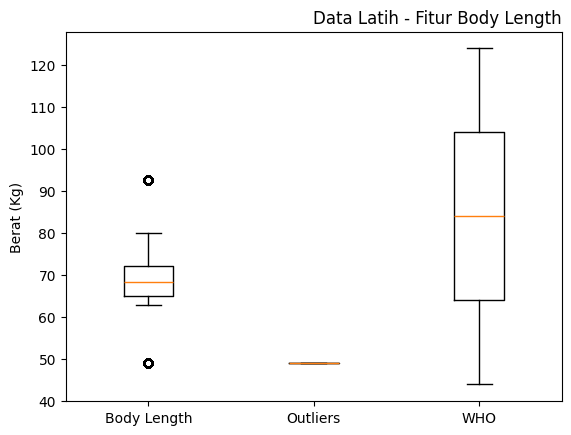

In [16]:
# Visualisasi data berbentuk boxplot untuk data Body Length
# Batasan WHO
who_length = list(range(44, 125))
data = [data_latih['Body Length'], outlier_length['Body Length'], who_length]
labels = ['Body Length', 'Outliers', 'WHO']

plt.title('Data Latih - Fitur Body Length', loc='right')
plt.ylabel('Berat (Kg)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [17]:
data_latih['Body Length'].describe()

count    10000.00000
mean        68.85492
std          8.90664
min         49.00000
25%         65.00000
50%         68.30000
75%         72.20000
max         92.70000
Name: Body Length, dtype: float64

In [18]:
# Eksport dataset latih mentah menjadi data_latih_clean.csv
data_latih.to_csv('./data_latih_clean.csv', index=False)